<a href="https://colab.research.google.com/github/Deyonrose/computer_vision/blob/main/2348513_cv_lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

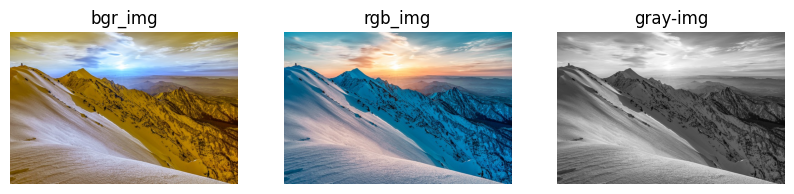

In [2]:
src="/content/mountain.jpg"
img=cv2.imread(src)
rgbimg=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
grayimg=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(10,8))

plt.subplot(1,3,1)
plt.title("bgr_img")
plt.axis("off")
plt.imshow(img)

plt.subplot(1,3,2)
plt.title("rgb_img")
plt.axis("off")
plt.imshow(rgbimg)

plt.subplot(1,3,3)
plt.title("gray-img")
plt.axis("off")
plt.imshow(grayimg,cmap='gray')



In [3]:
print(grayimg.shape)

(427, 640)


(-0.5, 639.5, 426.5, -0.5)

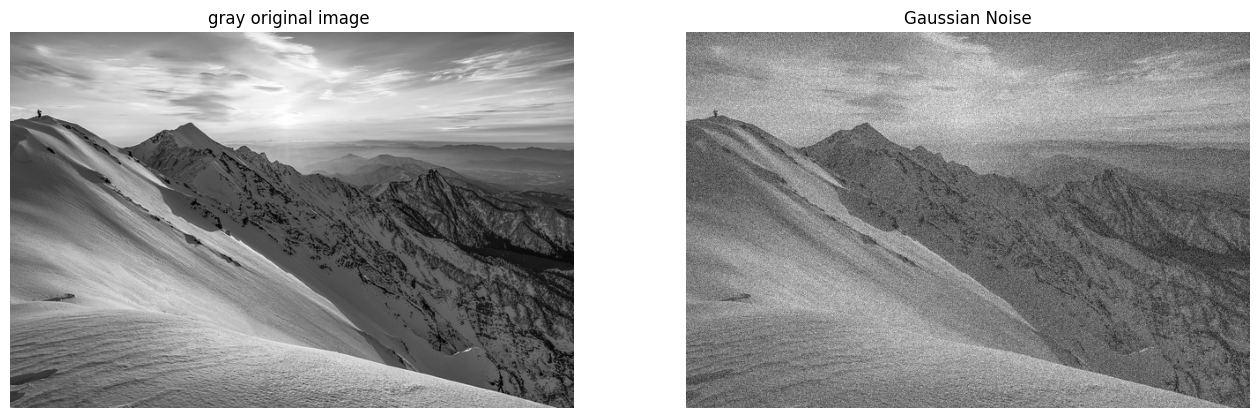

In [4]:
#add gaussian noise
mean=0
std_dev=25
gaussian_noise = np.random.normal(mean, std_dev, grayimg.shape)
noisy_image_gaussian = grayimg + gaussian_noise



plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.imshow(grayimg, cmap='gray')
plt.title('gray original image ')
plt.axis('off')



# Noisy Gray Image with Gaussian Noise
plt.subplot(1, 2, 2)
plt.imshow(noisy_image_gaussian, cmap='gray')
plt.title('Gaussian Noise')
plt.axis('off')



(-0.5, 639.5, 426.5, -0.5)

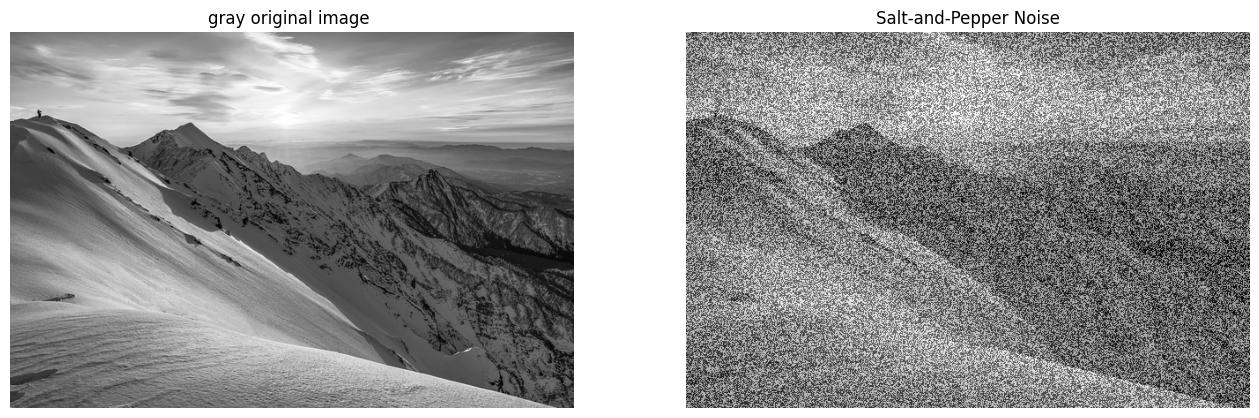

In [5]:
salt_and_pepper_noise = np.random.randint(0, 2, grayimg.shape) * 255
noisy_gray_img_salt_pepper = grayimg + salt_and_pepper_noise


plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.imshow(grayimg, cmap='gray')
plt.title('gray original image ')
plt.axis('off')
# Noisy Gray Image with Salt-and-Pepper Noise
plt.subplot(1, 2, 2)
plt.imshow(noisy_gray_img_salt_pepper, cmap='gray')
plt.title('Salt-and-Pepper Noise')
plt.axis('off')

(-0.5, 639.5, 426.5, -0.5)

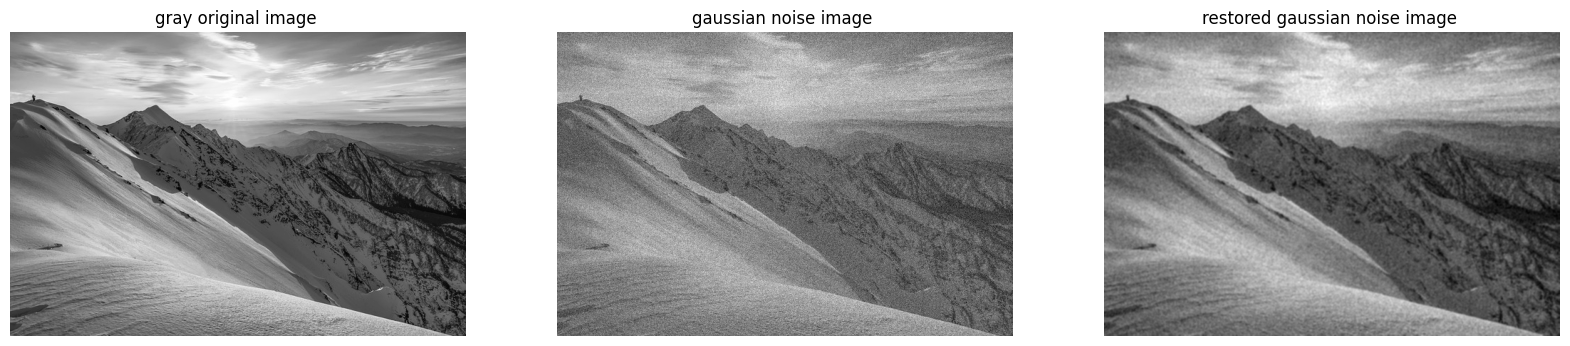

In [6]:
restored_image_gaussian = cv2.GaussianBlur(noisy_image_gaussian, (5, 5), 0)


plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.imshow(grayimg, cmap='gray')
plt.title('gray original image ')
plt.axis('off')

plt.subplot(1,3,2)

plt.imshow(noisy_image_gaussian, cmap='gray')
plt.title('gaussian noise image ')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(restored_image_gaussian, cmap='gray')
plt.title('restored gaussian noise image ')
plt.axis('off')


(-0.5, 639.5, 426.5, -0.5)

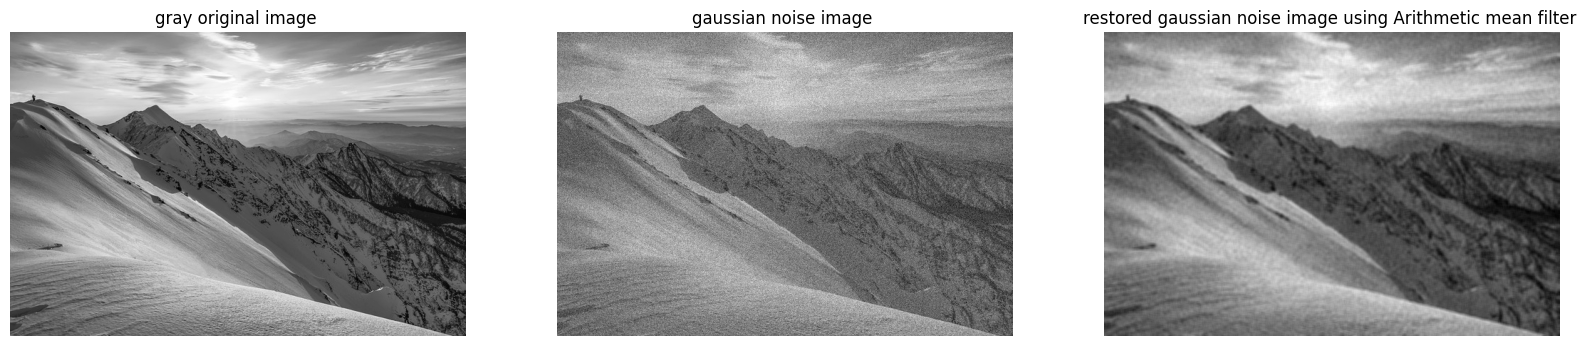

In [7]:
#arithmetic mean filter
kernel_size = (5, 5)  # Set the kernel size for the arithmetic mean filter
restored_image_arithmetic_mean = cv2.blur(noisy_image_gaussian, kernel_size)


plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.imshow(grayimg, cmap='gray')
plt.title('gray original image ')
plt.axis('off')

plt.subplot(1,3,2)

plt.imshow(noisy_image_gaussian, cmap='gray')
plt.title('gaussian noise image ')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(restored_image_arithmetic_mean, cmap='gray')
plt.title('restored gaussian noise image using Arithmetic mean filter ')
plt.axis('off')



(-0.5, 639.5, 426.5, -0.5)

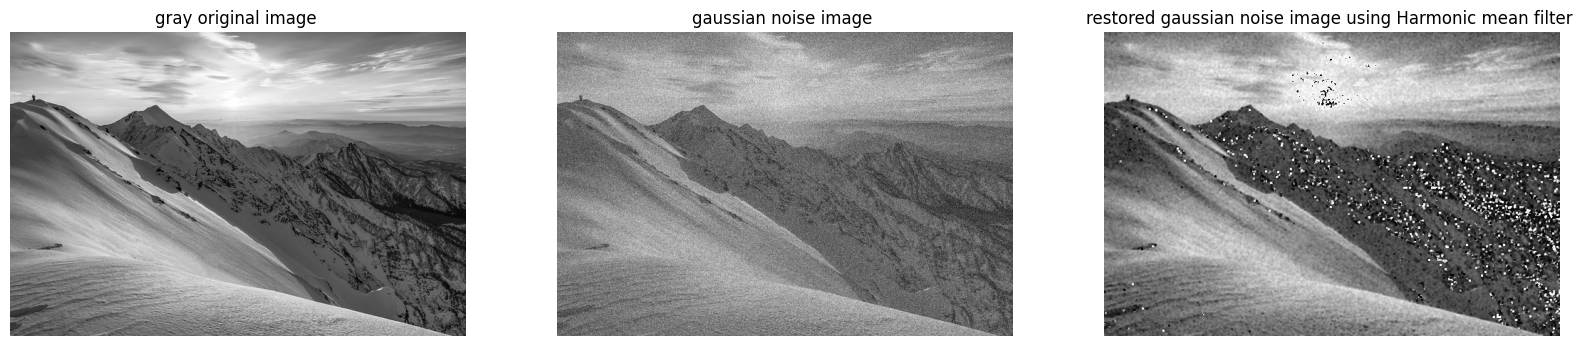

In [8]:
def harmonic_mean_filter(noisy_image_gaussian, kernel_size):
    inverted_image = 1 / (noisy_image_gaussian .astype(np.float32) + 1e-6)  # Avoid division by zero
    kernel = np.ones(kernel_size) / (kernel_size[0] * kernel_size[1])
    filtered_image = cv2.filter2D(inverted_image, -1, kernel)
    restored_image = 1 / (filtered_image + 1e-6)
    return restored_image.astype(np.uint8)

kernel_size = (3, 3)  # Define the kernel size for the Harmonic Mean Filter
restored_image_harmonic_mean = harmonic_mean_filter(noisy_image_gaussian, kernel_size)

plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.imshow(grayimg, cmap='gray')
plt.title('gray original image ')
plt.axis('off')

plt.subplot(1,3,2)

plt.imshow(noisy_image_gaussian, cmap='gray')
plt.title('gaussian noise image ')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(restored_image_harmonic_mean, cmap='gray')
plt.title('restored gaussian noise image using Harmonic mean filter ')
plt.axis('off')




(-0.5, 639.5, 426.5, -0.5)

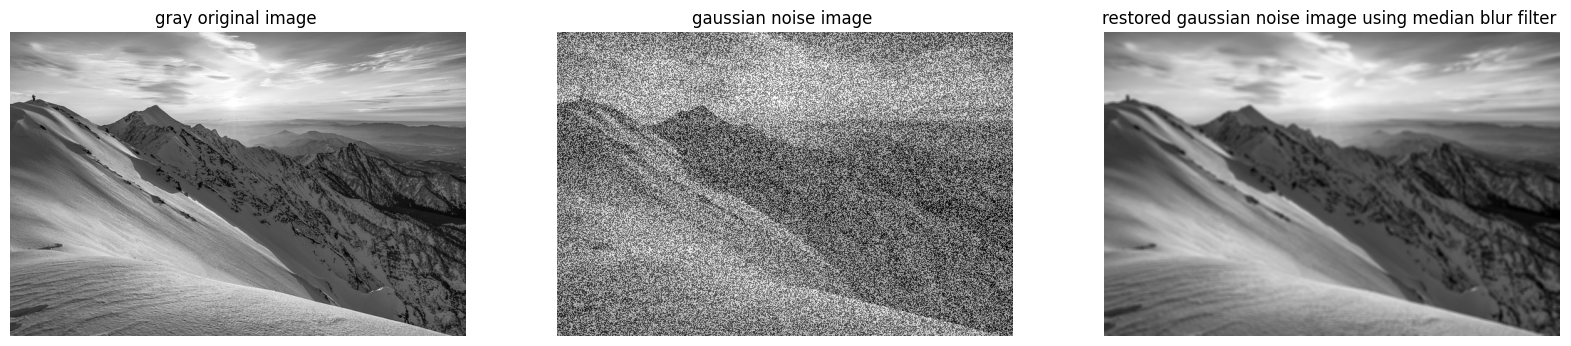

In [9]:
#Restore salt images
# Restore Image with Salt-and-Pepper Noise using Median Filter
# Convert the noisy image to uint8 format
noisy_gray_img_salt_pepper_uint8 = np.uint8(noisy_gray_img_salt_pepper)

restored_image_salt_pepper = cv2.blur(noisy_gray_img_salt_pepper_uint8, (5,5))

plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.imshow(grayimg, cmap='gray')
plt.title('gray original image ')
plt.axis('off')

plt.subplot(1,3,2)

plt.imshow(noisy_gray_img_salt_pepper, cmap='gray')
plt.title('gaussian noise image ')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(restored_image_salt_pepper, cmap='gray')
plt.title('restored gaussian noise image using median blur filter ')
plt.axis('off')


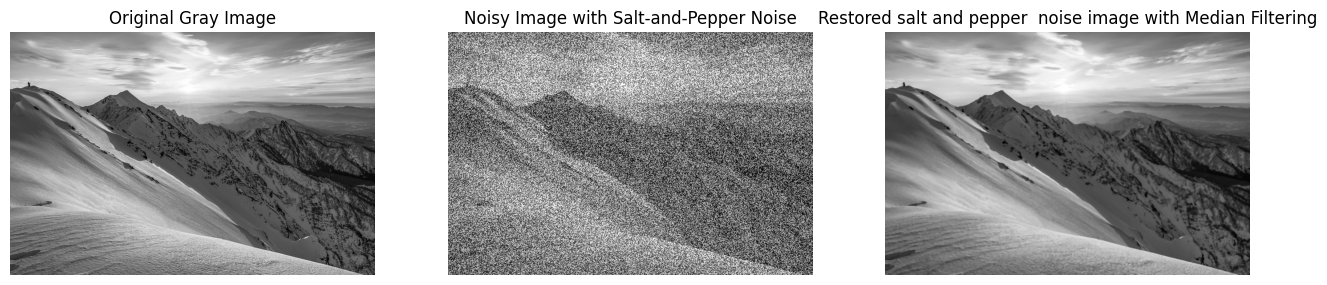

In [10]:

# Apply median filtering to restore the image
restored_image = cv2.medianBlur(noisy_gray_img_salt_pepper_uint8, 3)

# Display the original image, noisy image, and the restored image
plt.figure(figsize=(16, 8))

# Original Gray Image
plt.subplot(1, 3, 1)
plt.imshow(grayimg, cmap='gray')
plt.title('Original Gray Image')
plt.axis('off')

# Noisy Gray Image with Salt-and-Pepper Noise
plt.subplot(1, 3, 2)
plt.imshow(noisy_gray_img_salt_pepper, cmap='gray')
plt.title('Noisy Image with Salt-and-Pepper Noise')
plt.axis('off')

# Restored Image using Median Filtering
plt.subplot(1, 3, 3)
plt.imshow(restored_image, cmap='gray')
plt.title('Restored salt and pepper  noise image with Median Filtering')
plt.axis('off')

plt.show()


(-0.5, 639.5, 426.5, -0.5)

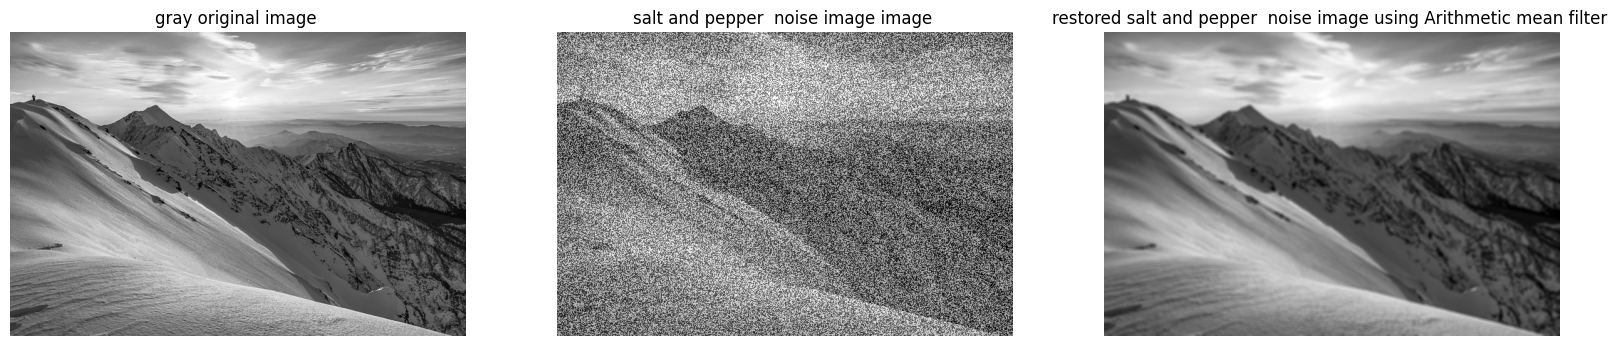

In [11]:
#arithmetic mean filter
kernel_size = (5, 5)  # Set the kernel size for the arithmetic mean filter
restored_image_arithmetic_mean = cv2.blur(noisy_gray_img_salt_pepper_uint8, kernel_size)


plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.imshow(grayimg, cmap='gray')
plt.title('gray original image ')
plt.axis('off')

plt.subplot(1,3,2)

plt.imshow(noisy_gray_img_salt_pepper, cmap='gray')
plt.title('salt and pepper  noise image image ')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(restored_image_arithmetic_mean, cmap='gray')
plt.title('restored salt and pepper  noise image using Arithmetic mean filter ')
plt.axis('off')



(-0.5, 639.5, 426.5, -0.5)

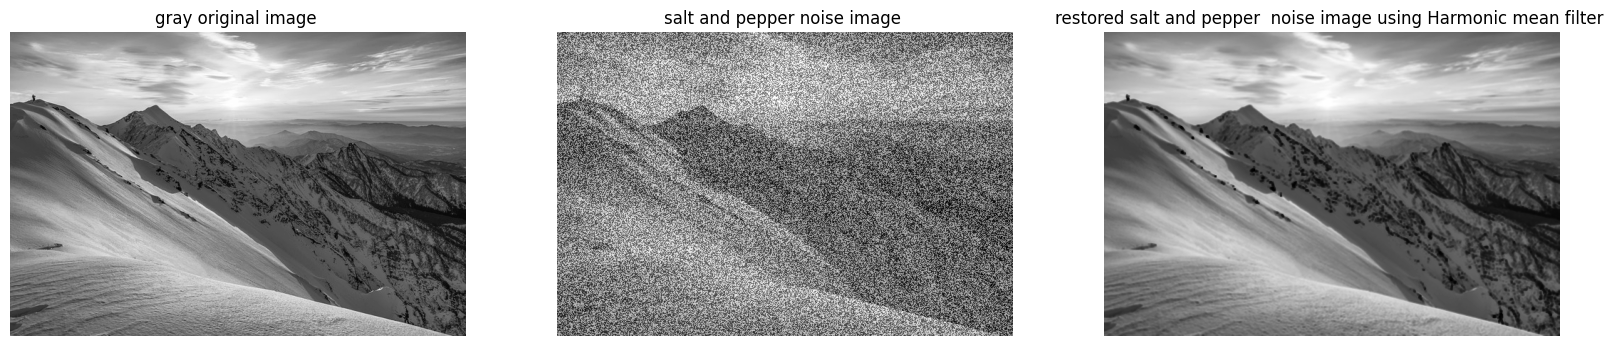

In [12]:
def harmonic_mean_filter(noisy_gray_img_salt_pepper, kernel_size):
    inverted_image = 1 / (noisy_gray_img_salt_pepper_uint8.astype(np.float32) + 1e-6)  # Avoid division by zero
    kernel = np.ones(kernel_size) / (kernel_size[0] * kernel_size[1])
    filtered_image = cv2.filter2D(inverted_image, -1, kernel)
    restored_image = 1 / (filtered_image + 1e-6)
    return restored_image.astype(np.uint8)

kernel_size = (3, 3)  # Define the kernel size for the Harmonic Mean Filter
restored_image_harmonic_mean = harmonic_mean_filter(noisy_gray_img_salt_pepper, kernel_size)

plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.imshow(grayimg, cmap='gray')
plt.title('gray original image ')
plt.axis('off')

plt.subplot(1,3,2)

plt.imshow(noisy_gray_img_salt_pepper, cmap='gray')
plt.title('salt and pepper noise image ')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(restored_image_harmonic_mean, cmap='gray')
plt.title('restored salt and pepper  noise image using Harmonic mean filter ')
plt.axis('off')



in this program the noises added in the image are gaussian ,salt and pepper and to restore these images after adding noise gaussian blur ,arithmentic mean and harmonic filter is implemented and harmonic mean filters and the results achieved for harmonic mean is less achieved image  quality than arithmetic mean and gaussian blur